In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Data source

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Data description  

##### The data is related with direct marketing campaigns of a Portuguese banking institution. 
##### The marketing campaigns were based on phone calls. Often, 
##### more than one contact to the same client was required, 
##### in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

#### Attribute Information

In [4]:
# Input variables: 
# bank client data:
# 1 - age (numeric)
# 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
# 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# 5 - default: has credit in default? (categorical: 'no','yes','unknown')
# 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
# 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
# 8 - contact: contact communication type (categorical: 'cellular','telephone')
# 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
# 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
# 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the 
    # output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
# 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# 14 - previous: number of contacts performed before this campaign and for this client (numeric)
# 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
# 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
# 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
# 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
# 19 - euribor3m: euribor 3 month interest rate - daily indicator (numeric)
# 20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
# 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

#### Data preview

In [5]:
bank_data = pd.read_csv("./bank-dataset/bank-additional-full.csv", sep=";")
bank_data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


#### Shape

In [6]:
bank_data.shape

(41188, 21)

In [7]:
pp = pprint.PrettyPrinter(indent=4)

#### Describe categorical features

In [8]:
categorical_features = [col for col in bank_data.columns if pd.api.types.is_string_dtype(bank_data[col])]
pp.pprint(categorical_features)

[   'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'poutcome',
    'y']


In [9]:
bank_data[categorical_features].describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


#### Counts of the categorical features 

In [10]:
def get_subplot_len(f):
    f = len(f)
    if f >= 10:
        if f % 2 == 0:
            return f // 2
        else:
            return (f + 1) // 2
    else:
        return f

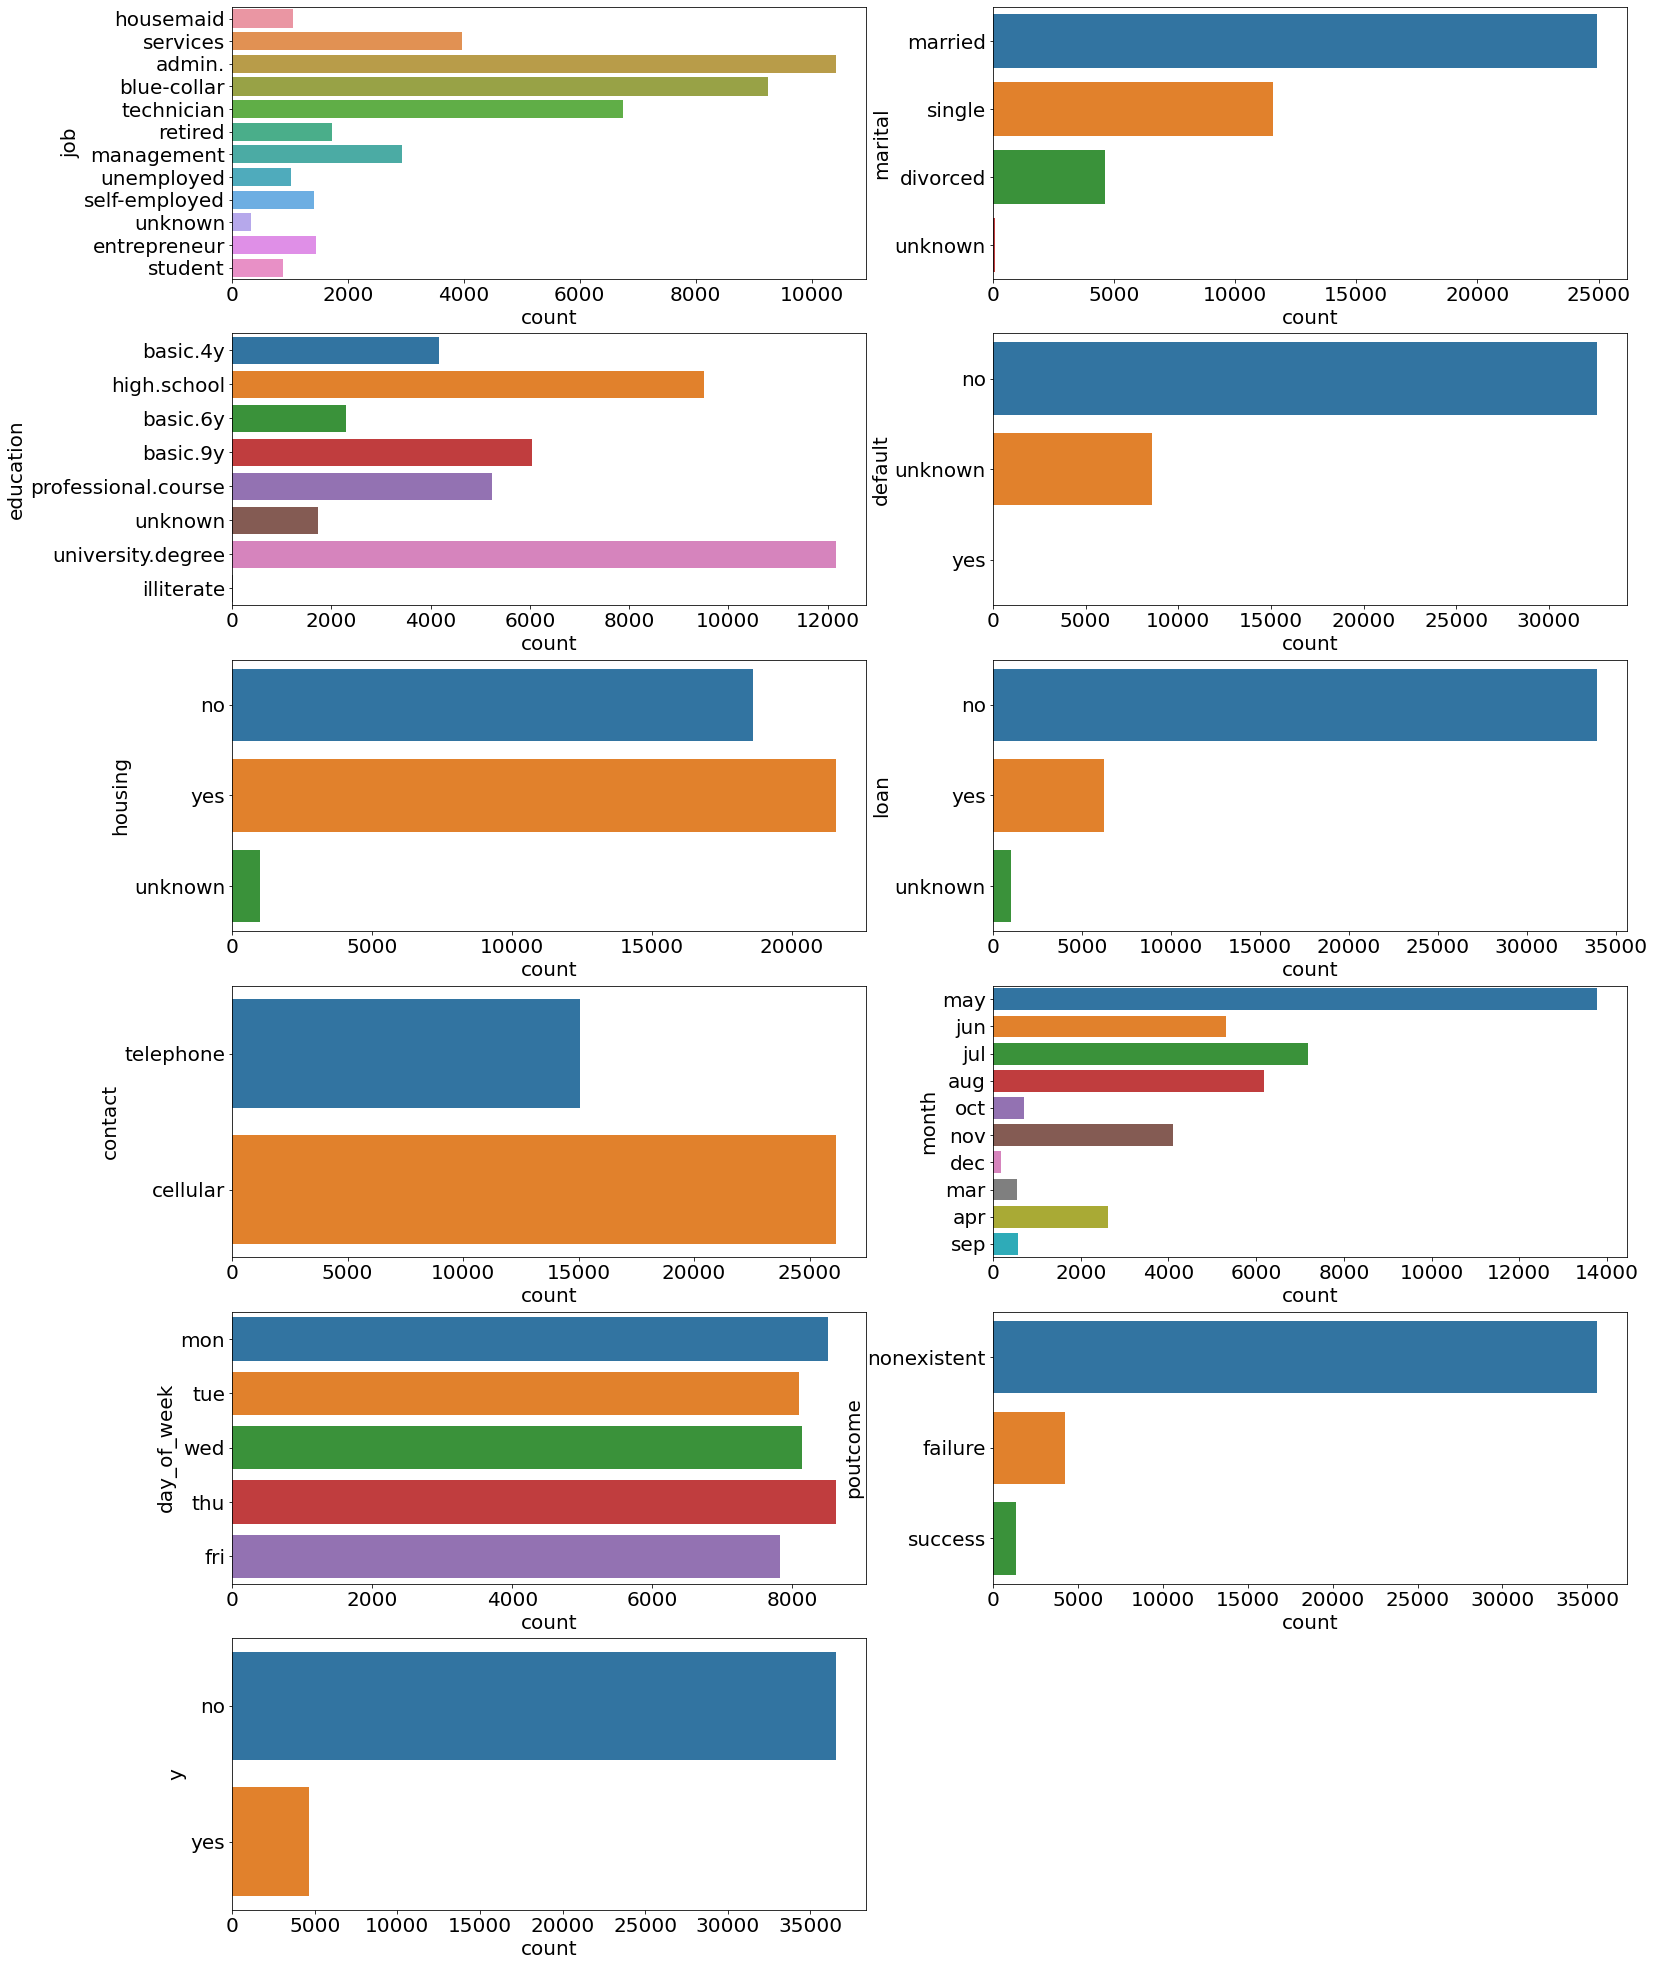

In [11]:
subplot_x = get_subplot_len(categorical_features)
plt.figure(figsize=(25, 35))
for idx, col in enumerate(categorical_features):
    plt.subplot(subplot_x, 2, idx + 1)
    ax = sns.countplot(data=bank_data, y=col)
    ax.set_xlabel("count", fontsize=20)
    ax.set_ylabel(col, fontsize=20)
    ax.tick_params(labelsize=20)
plt.savefig("./figures/categorical_features_counts.png", format="png", dpi=500)

#### Numerical features

In [12]:
numerical_features = [col for col in bank_data.columns if np.issubdtype(bank_data[col].dtype, np.number)]
pp.pprint(numerical_features)

[   'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed']


#### Describe numerical features

In [13]:
bank_data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


#### Distributions of the numerical features 

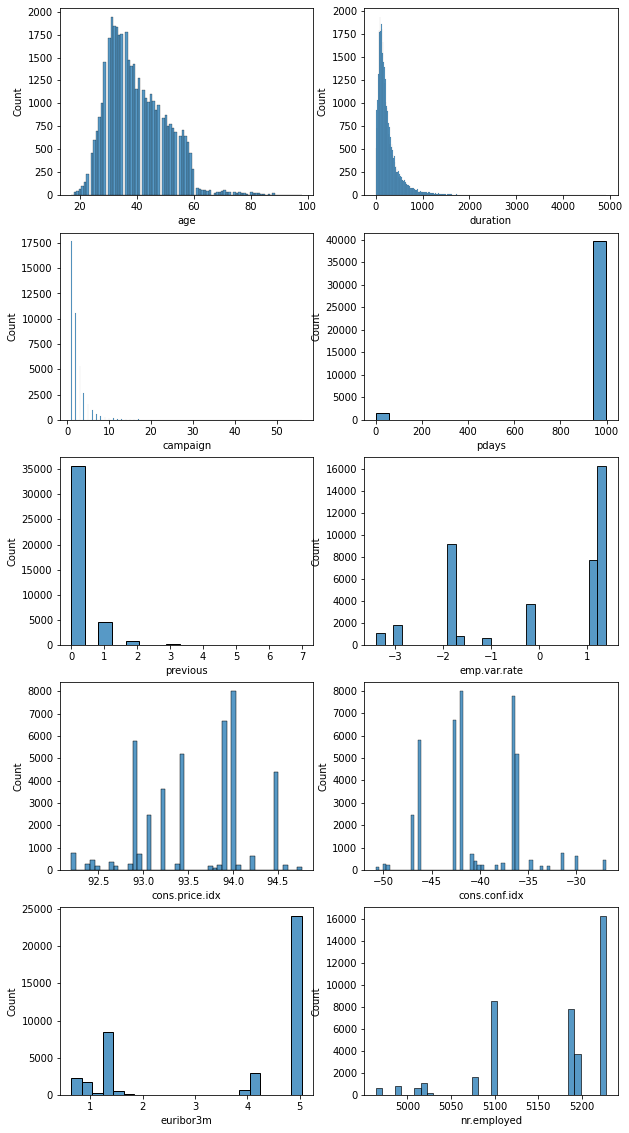

In [14]:
subplot_x = get_subplot_len(numerical_features)
plt.figure(figsize=(10, 20))
for idx, col in enumerate(numerical_features):
    plt.subplot(subplot_x, 2, idx + 1)
    sns.histplot(bank_data[col])
plt.savefig("./figures/numerical_features_dist.png", format="png", dpi=500)

###### _Age, duration and campaign have right skewed distributions._

#### Total client calls

In [15]:
print(bank_data.y.value_counts(ascending=True))

yes     4640
no     36548
Name: y, dtype: int64


#### Percentage of client calls

In [16]:
print(round(bank_data.y.value_counts(ascending=True, normalize=True) * 100))

yes    11.0
no     89.0
Name: y, dtype: float64


#### Violin plots for numerical features of client calls

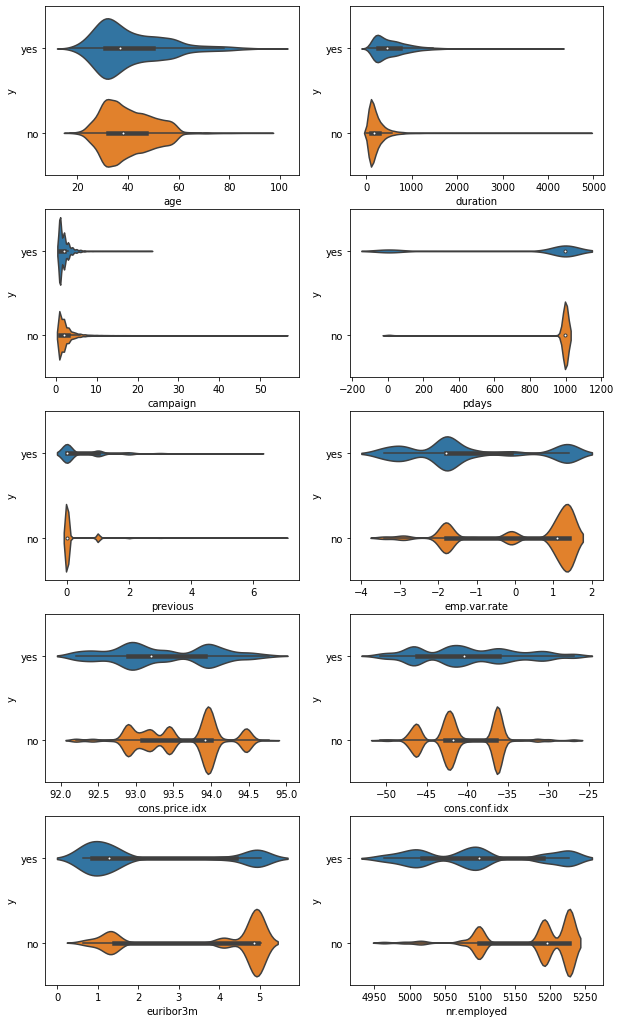

In [17]:
plt.figure(figsize=(10, 18))
for idx, col in enumerate(numerical_features):
    plt.subplot(get_subplot_len(numerical_features), 2, idx + 1)
    sns.violinplot(x=col, y="y", data=bank_data, order=["yes", "no"])
plt.savefig("./figures/numerical_features_violin_plot.png", format="png", dpi=500)

#### Hypothesis: Is the average value of the numerical features different between yes and no?

In [18]:
from scipy.stats import ttest_ind

In [19]:
def test_means(col, data):
    condition = data["y"] == "yes"
    values_yes = data[col][condition]
    values_no = data[col][~condition]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()
    ttests = ttest_ind(values_yes, values_no)
    return [col, mean_yes, mean_no, round(ttests[0], 4), round(ttests[1], 4)]
    

In [20]:
test_df = pd.DataFrame(columns=["feature", "mean_yes", "mean_no", "ttest stat", "ttest p-val"])

In [21]:
for idx, col in enumerate(numerical_features):
    test_df.loc[idx] = test_means(col, bank_data)
test_df

,feature,mean_yes,mean_no,ttest stat,ttest p-val
0,age,40.913147,39.911185,6.1721,0.0
1,duration,553.191164,220.844807,89.9672,0.0
2,campaign,2.051724,2.633085,-13.4965,0.0
3,pdays,792.035560,984.113878,-69.7221,0.0
4,previous,0.492672,0.132374,48.0027,0.0
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.0
6,cons.price.idx,93.354386,93.603757,-27.9032,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.0
8,euribor3m,2.123135,3.811491,-65.6466,0.0
9,nr.employed,5095.115991,5176.166600,-76.9845,0.0


In [22]:
test_df_p_values = test_df["ttest p-val"].sum()

In [23]:
def significance_level(p):
    CI = 0.05
    if p < CI:
        print("reject the null hypothesis")
    else:
         print("cannot reject the null hypothesis")

In [24]:
significance_level(test_df_p_values)

reject the null hypothesis


##### _There is a statistically significant difference in the mean values of numerical features._

#### Hypothesis: Is the a difference between distributions of numerical features ?

In [25]:
from scipy.stats import ks_2samp

In [26]:
def test_ks(col, data):
    condition = data["y"] == "yes"
    values_yes = data[col][condition]
    values_no = data[col][~condition]
    kstest = ks_2samp(values_yes, values_no)
    return [col, round(kstest[0], 4), round(kstest[1], 4)]

In [27]:
test_df = pd.DataFrame(columns=["features", "ks stat", "ks p-val"])

In [28]:
for idx, col in enumerate(numerical_features):
    test_df.loc[idx] = test_ks(col, bank_data)
test_df

,features,ks stat,ks p-val
0,age,0.0861,0.0
1,duration,0.4641,0.0
2,campaign,0.0808,0.0
3,pdays,0.1934,0.0
4,previous,0.2102,0.0
5,emp.var.rate,0.4324,0.0
6,cons.price.idx,0.2281,0.0
7,cons.conf.idx,0.1998,0.0
8,euribor3m,0.4326,0.0
9,nr.employed,0.4324,0.0


In [29]:
test_df_p_values = test_df["ks p-val"].sum()

In [30]:
significance_level(test_df_p_values)

reject the null hypothesis


##### _There is a statistically significant difference in the distribution values of numerical features._

#### Pairplots between numerical features

In [31]:
campaign_columns = ["age", "duration", "campaign", "previous"]
financial_columns = ["emp.var.rate", "cons.price.idx", "cons.conf.idx",  "euribor3m"]

In [32]:
plot_data = bank_data[campaign_columns + ["y"]]

#### Pairplot of campaign features

<Figure size 720x720 with 0 Axes>

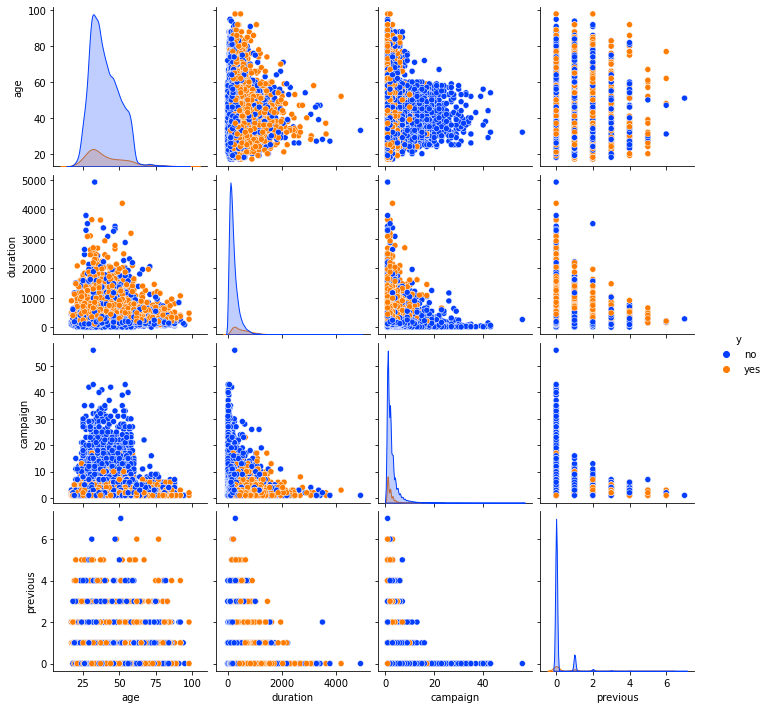

In [33]:
plt.figure(figsize=(10, 10))
sns.pairplot(plot_data, hue="y", palette="bright")
plt.savefig("./figures/campaign_pairplot.png", format="png", dpi=500)

##### Observation: most sucessfull subcriptions were with previously contacted customers

#### Pairplot of financial features

In [34]:
plot_data = bank_data[financial_columns + ["y"]]

<Figure size 720x720 with 0 Axes>

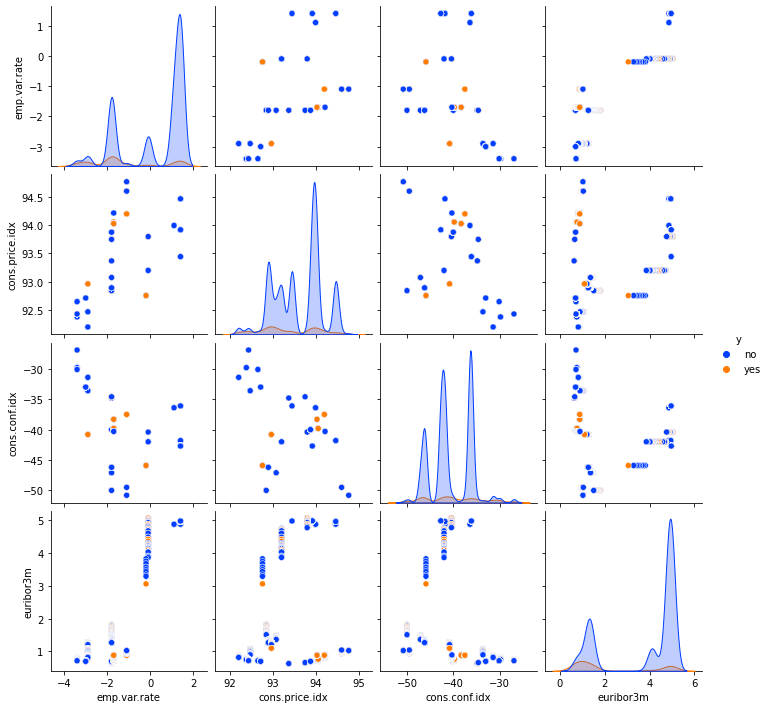

In [35]:
plt.figure(figsize=(10, 10))
sns.pairplot(plot_data, hue="y", palette="bright")
plt.savefig("./figures/financial_pairplot.png", format="png", dpi=500)

#### Correlation matrix of numerical features for (yes) calls 

In [36]:
calls = bank_data.y == "yes"
plot_data = bank_data[campaign_columns + financial_columns][calls]
successful_correlation = plot_data.corr()

In [37]:
successful_correlation.style.background_gradient(cmap="coolwarm").format(precision=2)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.00,-0.06,-0.01,0.07,-0.08,-0.02,0.14,-0.09
duration,-0.06,1.00,0.16,-0.23,0.50,0.24,-0.14,0.50
campaign,-0.01,0.16,1.00,-0.10,0.22,0.12,-0.04,0.21
previous,0.07,-0.23,-0.10,1.00,-0.28,0.09,0.13,-0.39
emp.var.rate,-0.08,0.50,0.22,-0.28,1.00,0.66,-0.27,0.93
cons.price.idx,-0.02,0.24,0.12,0.09,0.66,1.00,-0.33,0.41
cons.conf.idx,0.14,-0.14,-0.04,0.13,-0.27,-0.33,1.00,-0.12
euribor3m,-0.09,0.50,0.21,-0.39,0.93,0.41,-0.12,1.00


##### Observation: High correlation between employment rate index and 3 month interest rate

#### Correlation matrix of numerical features for (no) calls 

In [38]:
plot_data = bank_data[campaign_columns + financial_columns][~calls]
unsuccessful_correlation = plot_data.corr()

In [39]:
unsuccessful_correlation.style.background_gradient(cmap="coolwarm").format(precision=2)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.00,0.00,0.01,-0.00,0.03,0.01,0.12,0.04
duration,0.00,1.00,-0.08,-0.00,0.00,0.02,0.00,0.01
campaign,0.01,-0.08,1.00,-0.07,0.13,0.12,-0.01,0.12
previous,-0.00,-0.00,-0.07,1.00,-0.42,-0.27,-0.14,-0.44
emp.var.rate,0.03,0.00,0.13,-0.42,1.00,0.80,0.32,0.98
cons.price.idx,0.01,0.02,0.12,-0.27,0.80,1.00,0.15,0.73
cons.conf.idx,0.12,0.00,-0.01,-0.14,0.32,0.15,1.00,0.39
euribor3m,0.04,0.01,0.12,-0.44,0.98,0.73,0.39,1.00


##### Observation: High correlation between employment rate index and 3 month interest rate

##### Difference between correlation of successful and unsuccessful calls

In [40]:
diff_correlation = successful_correlation - unsuccessful_correlation
diff_correlation.style.background_gradient(cmap="coolwarm").format(precision=2)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,0.00,-0.06,-0.02,0.08,-0.11,-0.04,0.02,-0.13
duration,-0.06,0.00,0.24,-0.23,0.50,0.22,-0.15,0.49
campaign,-0.02,0.24,0.00,-0.04,0.09,-0.01,-0.04,0.10
previous,0.08,-0.23,-0.04,0.00,0.14,0.36,0.27,0.05
emp.var.rate,-0.11,0.50,0.09,0.14,0.00,-0.14,-0.59,-0.05
cons.price.idx,-0.04,0.22,-0.01,0.36,-0.14,0.00,-0.48,-0.32
cons.conf.idx,0.02,-0.15,-0.04,0.27,-0.59,-0.48,0.00,-0.51
euribor3m,-0.13,0.49,0.10,0.05,-0.05,-0.32,-0.51,0.00


##### _Observation: Significant difference between employment rate and duration of call and_
#####              _a significant difference between 3 month interest rate and duration of call_

In [41]:
successful_correlation

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.000000,-0.059319,-0.007920,0.074937,-0.081579,-0.024695,0.141166,-0.085403
duration,-0.059319,1.000000,0.156859,-0.231527,0.503056,0.237558,-0.143827,0.499710
campaign,-0.007920,0.156859,1.000000,-0.104093,0.221760,0.116511,-0.042858,0.211863
previous,0.074937,-0.231527,-0.104093,1.000000,-0.284754,0.091215,0.127833,-0.391993
emp.var.rate,-0.081579,0.503056,0.221760,-0.284754,1.000000,0.660341,-0.267241,0.926117
cons.price.idx,-0.024695,0.237558,0.116511,0.091215,0.660341,1.000000,-0.328344,0.414585
cons.conf.idx,0.141166,-0.143827,-0.042858,0.127833,-0.267241,-0.328344,1.000000,-0.120171
euribor3m,-0.085403,0.499710,0.211863,-0.391993,0.926117,0.414585,-0.120171,1.000000


#### Feature estimation with linear regression

In [42]:
import statsmodels.api as sm

In [43]:
# feature 
X = bank_data[["emp.var.rate", "cons.price.idx", "euribor3m"]]
X = sm.add_constant(X)
# target
y = bank_data["cons.conf.idx"]

linear_regress = sm.OLS(y, X)
predict = linear_regress.fit()
print(predict.summary())

                            OLS Regression Results                            
Dep. Variable:          cons.conf.idx   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:24:49   Log-Likelihood:            -1.1753e+05
No. Observations:               41188   AIC:                         2.351e+05
Df Residuals:                   41184   BIC:                         2.351e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -82.4025      5.999    -13.

##### _Observation:_ 
##### _if the confidence consumer index is increased by 1 then_
##### _the employment rate, consumer price index and the 3 month interest will change respective to their_ 
##### _coeficients_